In [1]:
!pip install google-api-python-client
!pip install openai-whisper
!pip install openai
!pip install tiktoken
!pip install gTTS pyttsx3 playsound
!pip install playsound
!pip install pytube
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the necessary libraries

In [2]:
import openai
import tiktoken
import whisper
import re
import openai
import pandas as pd
import numpy as np
from IPython.display import YouTubeVideo
from pytube import YouTube
from moviepy.editor import *

In [3]:
openai.api_key = ''
model=whisper.load_model('base')

## Provide YT Video ID

Please enter YT Video IDmW7RSGPK_NU


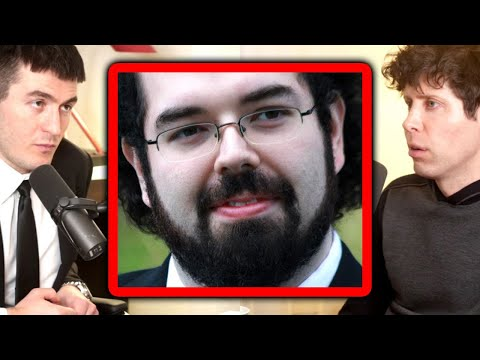

In [4]:
video_id = input("Please enter YT Video ID")
YouTubeVideo( video_id, width=800, height=300)

In [5]:
link = "https://youtube.com/watch?v=" + video_id
yt = YouTube(link)
audio = yt.streams.filter(only_audio=True).first()

audio_file = audio.download(filename_prefix="audio_")
audio_file_name = "audio_" + video_id +  ".mp3"
AudioFileClip(audio_file).write_audiofile(audio_file_name)


MoviePy - Writing audio in audio_mW7RSGPK_NU.mp3


MoviePy - Done.


In [6]:
# Task 1:  read audio file and then collect the transcript along with the timestamps
def transcribe_audio(audio, lang='English'):
  # languages = {"af_za": "Afrikaans", "am_et": "Amharic", "ar_eg": "Arabic", "as_in": "Assamese", "az_az": "Azerbaijani", "be_by": "Belarusian", "bg_bg": "Bulgarian", "bn_in": "Bengali", "bs_ba": "Bosnian", "ca_es": "Catalan", "cmn_hans_cn": "Chinese", "cs_cz": "Czech", "cy_gb": "Welsh", "da_dk": "Danish", "de_de": "German", "el_gr": "Greek", "en_us": "English", "es_419": "Spanish", "et_ee": "Estonian", "fa_ir": "Persian", "fi_fi": "Finnish", "fil_ph": "Tagalog", "fr_fr": "French", "gl_es": "Galician", "gu_in": "Gujarati", "ha_ng": "Hausa", "he_il": "Hebrew", "hi_in": "Hindi", "hr_hr": "Croatian", "hu_hu": "Hungarian", "hy_am": "Armenian", "id_id": "Indonesian", "is_is": "Icelandic", "it_it": "Italian", "ja_jp": "Japanese", "jv_id": "Javanese", "ka_ge": "Georgian", "kk_kz": "Kazakh", "km_kh": "Khmer", "kn_in": "Kannada", "ko_kr": "Korean", "lb_lu": "Luxembourgish", "ln_cd": "Lingala", "lo_la": "Lao", "lt_lt": "Lithuanian", "lv_lv": "Latvian", "mi_nz": "Maori", "mk_mk": "Macedonian", "ml_in": "Malayalam", "mn_mn": "Mongolian", "mr_in": "Marathi", "ms_my": "Malay", "mt_mt": "Maltese", "my_mm": "Myanmar", "nb_no": "Norwegian", "ne_np": "Nepali", "nl_nl": "Dutch", "oc_fr": "Occitan", "pa_in": "Punjabi", "pl_pl": "Polish", "ps_af": "Pashto", "pt_br": "Portuguese", "ro_ro": "Romanian", "ru_ru": "Russian", "sd_in": "Sindhi", "sk_sk": "Slovak", "sl_si": "Slovenian", "sn_zw": "Shona", "so_so": "Somali", "sr_rs": "Serbian", "sv_se": "Swedish", "sw_ke": "Swahili", "ta_in": "Tamil", "te_in": "Telugu", "tg_tj": "Tajik", "th_th": "Thai", "tr_tr": "Turkish", "uk_ua": "Ukrainian", "ur_pk": "Urdu", "uz_uz": "Uzbek", "vi_vn": "Vietnamese", "yo_ng": "Yoruba"}
  language = lang
  options = dict(language=language, beam_size=5, best_of=5)
  translate_options = dict(task="translate", **options)
  translation_segments = model.transcribe(audio, **translate_options)["segments"]
  transcript_seg=[]
  for i in range(len(translation_segments)):
    transcript_seg.append('[' + str(round(translation_segments[i]['start'],2))+'-'+str(round(translation_segments[i]['end'],2)) + ']' + translation_segments[i]['text'])
  
  return transcript_seg



In [7]:
def chat(inp, ques, message_history, role="user"):

    """Question to be asked to the chatgpt api
    Args:
        inp (str): Input from the user
        message_history (list): Message history
        role (str): Role of the user
    Returns:
        reply (str): Reply from the chatgpt api
    """

    inp = inp + ques

    # Append the input message to the message history
    message_history.append({"role": role, "content": f"{inp}"})

    # Generate a chat response using the OpenAI API
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=message_history
    )

    # Grab just the text from the API completion response
    reply_content = completion.choices[0].message.content

    # Append the generated response to the message history
    message_history.append({"role": "assistant", "content": f"{reply_content}"})

    # Return the generated response.
    return reply_content

In [8]:
def count_tokens(text):

    """Count the number of tokens in a text
    Args:
        text (str): Text to count tokens for
    Returns:
        num_tokens (int): Number of tokens in the text
    """
    encoding = tiktoken.get_encoding("gpt2")
    input_ids = encoding.encode(text)
    num_tokens = len(input_ids)
    return num_tokens


def break_up_file_to_chunks(text, chunk_size=2000, overlap=100):

    tokens = encoding.encode(text)
    num_tokens = len(tokens)
    
    chunks = []
    for i in range(0, num_tokens, chunk_size - overlap):
        chunk = tokens[i:i + chunk_size]
        chunks.append(chunk)
    
    return chunks


In [9]:
def split_tokens_chat(transcript_seg, type):
  prompt_response = []
  encoding = tiktoken.get_encoding("gpt2")
  chunks = break_up_file_to_chunks(transcript_seg)

  for i, chunk in enumerate(chunks):

      prompt_request = "Summarize this: " + encoding.decode(chunks[i])
      messages = [{"role": "system", "content": "This is text summarization."}]    
      messages.append({"role": "user", "content": prompt_request})

      response = openai.ChatCompletion.create(
              model="gpt-3.5-turbo",
              messages=messages,
              temperature=.5,
              max_tokens=500,
              top_p=1,
              frequency_penalty=0,
              presence_penalty=0
      )
      
      prompt_response.append(response["choices"][0]["message"]['content'].strip())

  if type == 'summarize':
    prompt_request = "Can you summarize this? " + str(prompt_response)
  
  if type == 'main_topics':
    prompt_request = "What are all the main topics and their corresponding start and end time stamps in the text? \
     follow this format: Main topic name followed by a comma then start time followed by a comma  not hyphen then end time followed by ; not new line dont use any other characters " + str(prompt_response)

  response = openai.Completion.create(
          model="text-davinci-003",
          prompt=prompt_request,
          temperature=.5,
          max_tokens=1000,
          top_p=1,
          frequency_penalty=0,
          presence_penalty=0
      )

  reply = response["choices"][0]["text"].strip()
  return reply




In [10]:
def convert_text(text):
  names = []
  start_times = []
  end_times = []

  # Split the data into entries using semicolons
  entries = text.split(';')

  for entry in entries:
      if entry.strip() == '':
          continue
      # Split each entry using commas
      segments = entry.split(',')

      # Append the respective values to their lists
      names.append(segments[0].strip())
      start_times.append(float(segments[1].strip())/60)
      
      # Remove any trailing periods from the end time and convert it to a float
      end_time = segments[2].strip()
      if end_time.endswith('.'):
          end_time = end_time[:-1]
      end_times.append(float(end_time)/60)

  return names, start_times, end_times

# Module: Main topics with *timestamps*

In [11]:
# Task 3: Main topics and their timestamps
def main_topics(file_name):
  transcript_seg=transcribe_audio(file_name)
  transcript_seg = "".join(transcript_seg)

  num_tokens = count_tokens(transcript_seg)
  if num_tokens > 2000:
    reply = split_tokens_chat(transcript_seg, 'main_topics')

  else:
    message_history = []
    reply = chat(transcript_seg, "What are all the main topics and their corresponding start and end time stamps in the text? \
    follow this format: Main topic name followed by a comma then start time followed by a comma  not hyphen then end time followed by ; not new line dont use any other characters",message_history )

  reply = reply.replace('\n', "")
  print(reply)
  # name, start_time, end_time = convert_text(reply)
  # return pd.DataFrame({'Main Topics': name, 'Start Time': start_time, 'End Time': end_time})

In [12]:
reply = main_topics(audio_file_name)
print(reply)

Increase in quality of life with AI, 0.0, 22.0;Importance of AI alignment with humans, 24.96, 55.44;Concerns about AI killing humans, 61.12, 76.32;Challenges in keeping AI aligned, 82.96, 108.64;Iterative approach to solving AI safety challenges, 110.24, 146.4;Importance of ongoing learning and adjustment in AI safety, 154.24, 238.88;Need for increased technical alignment work, 251.44, 264.0.
None
